In [1]:
#import open3d
#import torch
#import cv2
import glob
import trimesh
import argparse
#import pymesh
import torch
import numpy as np
#from pymesh import load_mesh, save_mesh, form_mesh

searching for scad in: /Users/syd/Documents/google-cloud-sdk/bin:/Users/syd/Documents/GitHub/llvm/bin:/usr/local/anaconda3/bin:/usr/local/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:export PYTHONPATH="/usr/local/lib/python2.6/site-packages:$PYTHONPATH":/opt/X11/bin:/Applications/OpenSCAD.app/Contents/MacOS


In [4]:
!ls dataset/modelnet40_off_aligned

#!conda install -c conda-forge trimesh -n ys
#!wget http://modelnet.cs.princeton.edu/ModelNet40.zip
#!wget --no-check-certificate https://lmb.informatik.uni-freiburg.de/resources/datasets/ORION/modelnet40_manually_aligned.tar

car


In [2]:
category = 'car'
offs = glob.glob('dataset/modelnet40_off_aligned/%s/train/*.off'%category)
annots = [x +'.annot' for x in offs]
#15:car_0040.off
#
index = 14
cur_off = offs[index]
cur_annot = annots[index]
print(cur_off)
f = open(annots[index],'r')
f.readlines()


dataset/modelnet40_off_aligned/car/train/car_0054.off


['90.000000\n', '0.000000\n']

In [3]:
def generate_random_pc(point_cloud_num,method='simple'):
    #limit_scale = [-1,1]
    if method=='simple':
        return torch.randn(point_cloud_num, 3)*2-torch.ones(point_cloud_num, 3)
    elif method=='poisson':
        limit_dis = 0.00001
        #pd = PoissonDisk3D(point_cloud_num,limit_dis,limit_size=[-1,1])
        pass
     

In [5]:
mesh = trimesh.load(cur_off,process=False)
verts = mesh.vertices
print(len(verts),len(verts[0]))

xs = verts[:,0].ravel()
ys = verts[:,1].ravel()
zs = verts[:,2].ravel()

xs_range = [np.min(xs),np.max(xs)]
ys_range = [np.min(ys),np.max(ys)]
zs_range = [np.min(zs),np.max(zs)]
xs_avg = np.sum(xs)/len(verts)
ys_avg = np.sum(ys)/len(verts)
zs_avg = np.sum(zs)/len(verts)
print(xs_avg,ys_avg,zs_avg)
print(xs_range,ys_range,zs_range)
#verts = generate_random_pc(len(verts)*2)
#print(mesh.is_watertight)
for facet in mesh.facets:
    mesh.visual.face_colors[facet] = trimesh.visual.random_color()
mesh.show()

220563 3
-2.3383816852962642 1.7644655367219342 0.3894918015623654
[TrackedArray(-4.96525), TrackedArray(-0.051951)] [TrackedArray(0.85087), TrackedArray(2.65714)] [TrackedArray(0.), TrackedArray(1.40159)]
False


/usr/local/anaconda3/lib/python3.7/site-packages/trimesh/visual/color.py:640: RuntimeWarning: divide by zero encountered in true_divide
  vertex_colors /= mesh.faces_sparse.sum(axis=1)
/usr/local/anaconda3/lib/python3.7/site-packages/trimesh/visual/color.py:640: RuntimeWarning: invalid value encountered in true_divide
  vertex_colors /= mesh.faces_sparse.sum(axis=1)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [17]:
#mesho = 
#mesh.bounding_box_oriented.show()



verts = mesh.apply_transform(mesh.bounding_box_oriented.primitive.transform).vertices
print(verts)
xs = verts[:,0].ravel()
ys = verts[:,1].ravel()
zs = verts[:,2].ravel()

xs_range = [np.min(xs),np.max(xs)]
ys_range = [np.min(ys),np.max(ys)]
zs_range = [np.min(zs),np.max(zs)]
xs_avg = np.sum(xs)/len(verts)
ys_avg = np.sum(ys)/len(verts)
zs_avg = np.sum(zs)/len(verts)
print(xs_avg,ys_avg,zs_avg)
print(xs_range,ys_range,zs_range)

[[-3.79625217  0.70737943  2.37142865]
 [-3.88755631  0.70541118  2.35378265]
 [-3.89772496  0.50689744  2.40023664]
 ...
 [-3.47610148  0.27406599  2.3305258 ]
 [-3.46293148  0.15025645  2.3308642 ]
 [-3.46293148  0.15025645  2.3308642 ]]
-3.926956762420493 -0.01869065425150384 0.17984684622168146
[TrackedArray(-4.31646002), TrackedArray(-2.91485929)] [TrackedArray(-0.91670387), TrackedArray(0.88956838)] [TrackedArray(-2.44704131), TrackedArray(2.46623949)]


In [9]:
in_mesh = load_mesh(offs[index]);
print(in_mesh.num_vertices, in_mesh.num_faces, in_mesh.num_voxels)
in_mesh.add_attribute("vertex_normal");
v_normals = in_mesh.get_vertex_attribute("vertex_normal");

out_mesh = form_mesh(in_mesh.vertices, np.zeros((0, 3), dtype=int));
out_mesh.add_attribute("nx");
out_mesh.add_attribute("ny");
out_mesh.add_attribute("nz");

avg_x = np.sum(v_normals[:,0].ravel())/in_mesh.num_vertices
avg_y = np.sum(v_normals[:,1].ravel())/in_mesh.num_vertices
avg_z = np.sum(v_normals[:,2].ravel())/in_mesh.num_vertices
#max,min +-1
#what if
print(avg_x,avg_y,avg_z)
radius_gen_points = 1.0/150


out_mesh.set_attribute("nx", v_normals[:,0].ravel());
out_mesh.set_attribute("ny", v_normals[:,1].ravel());
out_mesh.set_attribute("nz", v_normals[:,2].ravel());

out_name = offs[index][:-4]+'.ply'
print(out_name)

#save_mesh(out_name, out_mesh, "nx", "ny", "nz");

NameError: name 'load_mesh' is not defined

In [57]:
mesh = pymesh.load_mesh(out_name)
print(mesh.num_vertices, mesh.num_faces, mesh.num_voxels)

def generate_neighbor_point(x,y,z):
    
    

53468 0 0


In [53]:
!ls dataset/modelnet40_off_aligned/car/train/ | grep ply

car_0082.ply
car_0108.ply


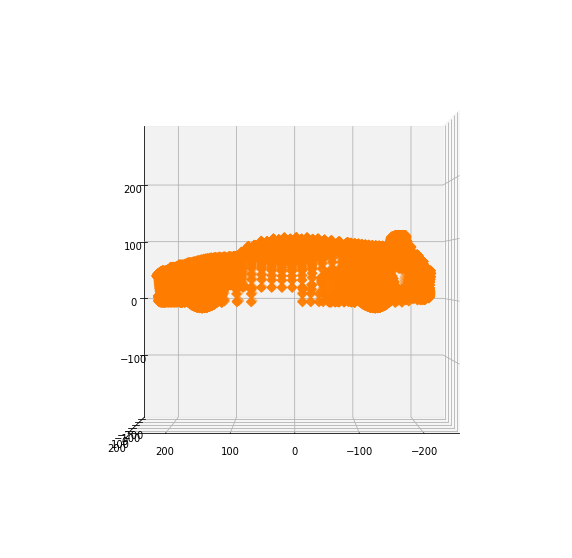

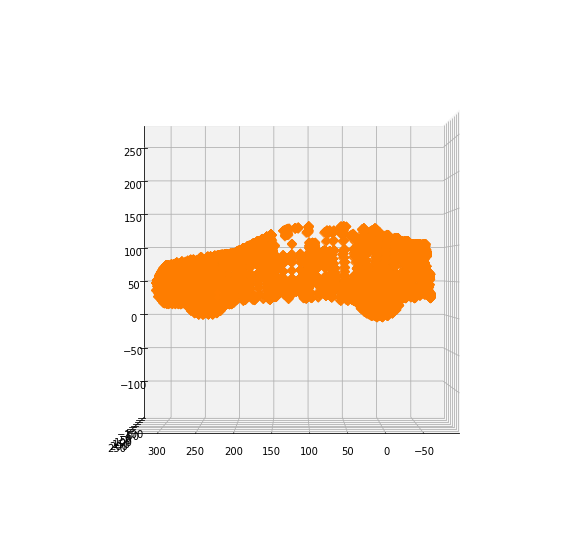

In [56]:
from pyntcloud import PyntCloud
car1 = PyntCloud.from_file("dataset/modelnet40_off_aligned/car/train/car_0082.ply")
car1.plot()
car2 = PyntCloud.from_file("dataset/modelnet40_off_aligned/car/train/car_0108.ply")
car2.plot()